In [2]:
#Importing required libraries
import numpy as np
import pandas as pd

In [3]:
#Loading dataset
startups = pd.read_csv("E:\\Top mentor files\\Batch 83 Day 21\\50_Startups.csv")

#Check first five rows of the dataset
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [4]:
#Statistical info about dataset
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
#Getting information on dataset
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


No Null Values

In [7]:
#Importing libraries to check Outliers
import seaborn as sns
import matplotlib.pyplot as plt

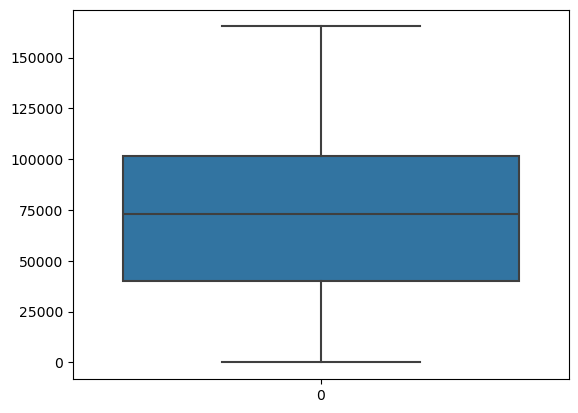

In [9]:
sns.boxplot(startups['R&D Spend'])
plt.show()

No outliers in R&D Spend

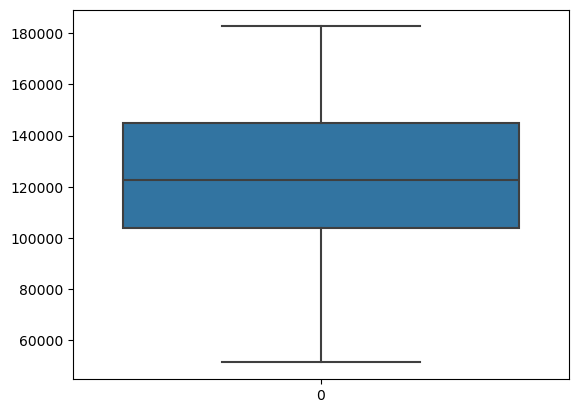

In [10]:
sns.boxplot(startups['Administration'])
plt.show()

No Outliers in Adminsitration

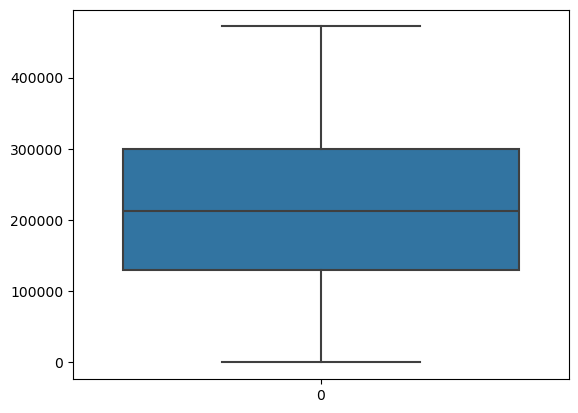

In [12]:
sns.boxplot(startups['Marketing Spend'])
plt.show()

No Outliers in Marketing Spend

but the three columns, 'R&D Spend', 'Administration', 'Marketing Spend' has to be scaled down so model doesnot gets biased towards one single feature

In [14]:
#Checking unique values in State column
startups['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

State column need label encoding

#Standard Scaling R&D Spend, Administration, Marketing Spend columns

In [21]:
#Scaling 'R&D Spend', 'Administration', 'Marketing Spend
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler()
startups.iloc[:,:-2] = scaled_data.fit_transform(startups.iloc[:,:-2])

In [26]:
#Label Encoding State
from sklearn.preprocessing import LabelEncoder
state_encoded = LabelEncoder()
startups['State'] = state_encoded.fit_transform(startups['State'])

Data is cleaned and scaled

In [34]:
#Splitting into dependent and independent variable
X = startups.iloc[:,:-1].values
y = startups.iloc[:,-1].values

In [37]:
#Splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 4)
(10, 4)
(40,)
(10,)


Creating linearn regression prediction model

In [39]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [40]:
#Predicting and checking the model accuracy
model_prediction = linear_model.predict(X_test)

In [43]:
#Checking accuracy
from sklearn.metrics import r2_score
model_score = r2_score(model_prediction, y_test)
print("Model Score = ", model_score)
print("The accuracy of the model is: ", model_score*100, "%")

Model Score =  0.9134420858547783
The accuracy of the model is:  91.34420858547783 %
